# Identifying Crypto-Asset Simple Arbitrage Opportunities
by Andrew Thorson  
March 10th, 2019

## Literature Review
The following information was obtained from an article published on finder.com entitled "Cryptocurrency arbitrage made easy: A beginner’s guide"<sup>1</sup>:
- With cryptocurrency trading still in its infancy and markets spread all around the world, there can sometimes be significant price differences between exchanges. Cryptocurrency arbitrage allows you to take advantage of those price differences, buying a crypto on one exchange where the price is low and then immediately selling it on another exchange where the price is high.
- There are multiple strategies arbitrage traders can use to make a profit, including the following:
    1. <b>Simple arbitrage.</b> Buying and selling the same coin immediately on separate exchanges.
    2. <b>Triangular arbitrage.</b> This process involves taking advantage of the price differences between three currencies. For example, buy BTC in USD, sell it to make EUR, and then exchange those EUR back to USD.
    3. <b>Convergence arbitrage.</b> This approach involves buying a coin on one exchange where it is undervalued and short-selling the same coin on another exchange where it is overvalued. When the two separate prices meet at a middle point, you can profit from the amount of convergence.

## Methodology
### Business Understanding
A client would like to take advantage of cryptocurrency exchange rate differences. The client would like to work with USD-Cryptocurrency exchanges, such as Bitcoin to USD and Ethereum to USD. The best opportunities are those where there is the greatest possible margin between the purchase transaction and the sale transaction. Simple arbitrage is the main strategy.

### Data Requirements
#### Data Sources
- <b>CoinMarketCap</b>  
    - "CoinMarketCap provides up-to-the-minute updates for all market data found on the site. Every minute, the various exchanges are queried for their most recent market data. All data is run through several data cleaning and verification algorithms to ensure data integrity." (https://coinmarketcap.com/methodology/)
        - <b>List of Exchanges</b>: Top 100 Cryptocurrency Exchanges by Trade Volume: https://coinmarketcap.com/rankings/exchanges/reported/
        - <b>Current Exchange Rates</b>

In [1]:
# import packages and libraries
import pandas as pd
import requests
from time import sleep
from lxml import html
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Data Collection

#### List of Top 100 Cryptocurrency Exchanges by Trade Volume

In [2]:
# Obtain list of Top 100 Cryptocurrency Exchanges by Trade Volume
page = requests.get("https://coinmarketcap.com/rankings/exchanges/reported/")
tree = html.fromstring(page.content)

In [3]:
# Construct DataFrame
top_100_exchanges = pd.DataFrame(columns=['name', 'cmc_url'])
top_100_exchanges

,name,cmc_url


In [4]:
# list of exchange names
name_list = tree.xpath(
    '//*[@id="exchange-rankings"]/tbody/tr/td[2]/a/text()')

In [5]:
# list of CoinMarketCap exchange urls
path_list = tree.xpath(
    '//*[@id="exchange-rankings"]/tbody/tr/td[2]/a/@href')
url_list = []
for path in path_list:
    url = "https://coinmarketcap.com" + path
    url_list.append(url)

In [6]:
# load exchange data into DataFrame
top_100_exchanges.name = name_list
top_100_exchanges.cmc_url = url_list
top_100_exchanges = top_100_exchanges.set_index('name')

In [7]:
top_100_exchanges

,cmc_url
name,
BitMax,https://coinmarketcap.com/exchanges/bitmax/
Bithumb,https://coinmarketcap.com/exchanges/bithumb/
Binance,https://coinmarketcap.com/exchanges/binance/
UPbit,https://coinmarketcap.com/exchanges/upbit/
DigiFinex,https://coinmarketcap.com/exchanges/digifinex/
HitBTC,https://coinmarketcap.com/exchanges/hitbtc/
BitMEX,https://coinmarketcap.com/exchanges/bitmex/
ZBG,https://coinmarketcap.com/exchanges/zbg/
BW,https://coinmarketcap.com/exchanges/bw/


In [8]:
# export DataFrame as tab-delimited file
top_100_exchanges.to_csv(path_or_buf='top_100_exchanges.tsv', sep = '\t')

#### Aggregate List of Active Exchanges

In [9]:
# import list of exchanges and cmc urls as DataFrame
top_100_exchanges = pd.read_csv('top_100_exchanges.tsv', sep = '\t').set_index('name')
top_100_exchanges

,cmc_url
name,
BitMax,https://coinmarketcap.com/exchanges/bitmax/
Bithumb,https://coinmarketcap.com/exchanges/bithumb/
Binance,https://coinmarketcap.com/exchanges/binance/
UPbit,https://coinmarketcap.com/exchanges/upbit/
DigiFinex,https://coinmarketcap.com/exchanges/digifinex/
HitBTC,https://coinmarketcap.com/exchanges/hitbtc/
BitMEX,https://coinmarketcap.com/exchanges/bitmex/
ZBG,https://coinmarketcap.com/exchanges/zbg/
BW,https://coinmarketcap.com/exchanges/bw/


In [10]:
# construct dataframe for aggregate data
agg_active_markets = pd.DataFrame(columns=['name', 'currency', 'pair', 'price_usd', 'price_btc', 'category', 'fee_type', 'updated'])
agg_active_markets

,name,currency,pair,price_usd,price_btc,category,fee_type,updated


In [11]:
def get_active_markets(name, url):
    """
    Generates dataframe of active market data from cmc for given exchange name, exchange url pair
    """
    active_market = pd.DataFrame(columns=['name', 'currency', 'pair', 'price_usd', 'price_btc', 'category', 'fee_type', 'updated'])
    page = requests.get(url)
    tree = html.fromstring(page.content)
    active_market.currency = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[2]/a/text()')
    active_market.pair = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[3]/a/text()')
    active_market.price_usd = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[5]/span/@data-usd')
    active_market.price_btc = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[5]/span/@data-btc')
    active_market.category = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[7]/text()')
    active_market.fee_type = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[8]/text()')
    active_market.updated = tree.xpath('//*[@id="exchange-markets"]/tbody/tr/td[9]/text()')
    active_market.name = name
    return(active_market)

In [12]:
# retrieve data and populate dataframe
for exchange_row in top_100_exchanges.iterrows():
    sleep(2)
    agg_active_markets = agg_active_markets.append(get_active_markets(exchange_row[0], exchange_row[1][0]))

In [13]:
# return DataFrame
agg_active_markets = agg_active_markets.reset_index().drop(['index'], axis=1)
agg_active_markets

,name,currency,pair,price_usd,price_btc,category,fee_type,updated
0,BitMax,Paxos Standard Token,PAX/USDT,1.01145454456,0.000256284714403,Spot,Transaction Mining,Recently
1,BitMax,USD Coin,USDC/USDT,1.01283389229,0.000256634216751,Spot,Transaction Mining,Recently
2,BitMax,Bitcoin,BTC/USDT,3949.67648212,1.00077462354,Spot,Percentage,Recently
3,BitMax,BitMax Token,BTMX/USDT,0.0655935219229,1.66202397558e-05,Spot,Percentage,Recently
4,BitMax,Stellar,XLM/BTC,0.102428089911,2.59534686069e-05,Spot,Percentage,Recently
5,BitMax,Ethereum,ETH/USDT,136.957856106,0.0347025756429,Spot,Percentage,Recently
6,BitMax,Stellar,XLM/USDT,0.102534870414,2.59805249002e-05,Spot,Percentage,Recently
7,BitMax,OneRoot Network,RNT/USDT,0.0642554539459,1.62811969671e-05,Spot,Percentage,Recently
8,BitMax,BitMax Token,BTMX/BTC,0.0657070967835,1.66490176191e-05,Spot,Percentage,Recently
9,BitMax,Ankr Network,ANKR/USDT,0.0123235154544,3.12256112312e-06,Spot,Percentage,Recently


In [14]:
# export DataFrame as tab-delimited file
agg_active_markets.to_csv(path_or_buf='agg_active_markets.tsv', sep = '\t')

#### Identify Simple Arbitrage Opportunities for United States Dollar Pairs

In [15]:
# import exchange data as DataFrame
agg_active_markets = pd.read_csv('agg_active_markets.tsv', sep = '\t').drop(['Unnamed: 0'], axis = 1)
agg_active_markets

,name,currency,pair,price_usd,price_btc,category,fee_type,updated
0,BitMax,Paxos Standard Token,PAX/USDT,1.011455,2.562847e-04,Spot,Transaction Mining,Recently
1,BitMax,USD Coin,USDC/USDT,1.012834,2.566342e-04,Spot,Transaction Mining,Recently
2,BitMax,Bitcoin,BTC/USDT,3949.676482,1.000775e+00,Spot,Percentage,Recently
3,BitMax,BitMax Token,BTMX/USDT,0.065594,1.662024e-05,Spot,Percentage,Recently
4,BitMax,Stellar,XLM/BTC,0.102428,2.595347e-05,Spot,Percentage,Recently
5,BitMax,Ethereum,ETH/USDT,136.957856,3.470258e-02,Spot,Percentage,Recently
6,BitMax,Stellar,XLM/USDT,0.102535,2.598052e-05,Spot,Percentage,Recently
7,BitMax,OneRoot Network,RNT/USDT,0.064255,1.628120e-05,Spot,Percentage,Recently
8,BitMax,BitMax Token,BTMX/BTC,0.065707,1.664902e-05,Spot,Percentage,Recently
9,BitMax,Ankr Network,ANKR/USDT,0.012324,3.122561e-06,Spot,Percentage,Recently


In [16]:
# drop non-USDT exchange pairs
USDT_agg_active_markets = agg_active_markets[agg_active_markets.pair.str.contains('USDT') == True]
USDT_agg_active_markets

,name,currency,pair,price_usd,price_btc,category,fee_type,updated
0,BitMax,Paxos Standard Token,PAX/USDT,1.011455,2.562847e-04,Spot,Transaction Mining,Recently
1,BitMax,USD Coin,USDC/USDT,1.012834,2.566342e-04,Spot,Transaction Mining,Recently
2,BitMax,Bitcoin,BTC/USDT,3949.676482,1.000775e+00,Spot,Percentage,Recently
3,BitMax,BitMax Token,BTMX/USDT,0.065594,1.662024e-05,Spot,Percentage,Recently
5,BitMax,Ethereum,ETH/USDT,136.957856,3.470258e-02,Spot,Percentage,Recently
6,BitMax,Stellar,XLM/USDT,0.102535,2.598052e-05,Spot,Percentage,Recently
7,BitMax,OneRoot Network,RNT/USDT,0.064255,1.628120e-05,Spot,Percentage,Recently
9,BitMax,Ankr Network,ANKR/USDT,0.012324,3.122561e-06,Spot,Percentage,Recently
13,BitMax,Fetch,FET/USDT,0.257122,6.515030e-05,Spot,Percentage,Recently
17,BitMax,XRP,XRP/USDT,0.315337,7.990083e-05,Spot,Percentage,Recently


In [17]:
# generate list of unique USDT-cryptocurrency pairs
unique_pairs = USDT_agg_active_markets.pair.unique()

In [18]:
# generate list of active_exchanges unique pair counts
pair_count = []
for pair in unique_pairs:
    count = USDT_agg_active_markets.pair[USDT_agg_active_markets.pair == pair].count()
    pair_count.append(count)

In [19]:
# construct dataframe of unique pairs and unique pair counts data
USDT_active_exchange_count_by_pair = pd.DataFrame(columns=['pair', 'active_exchanges'])
USDT_active_exchange_count_by_pair.pair = unique_pairs
USDT_active_exchange_count_by_pair.active_exchanges = pair_count
USDT_active_exchange_count_by_pair = USDT_active_exchange_count_by_pair[USDT_active_exchange_count_by_pair.active_exchanges > 1]
USDT_active_exchange_count_by_pair = USDT_active_exchange_count_by_pair.sort_values('active_exchanges', ascending = False).set_index(['pair'])
USDT_active_exchange_count_by_pair

,active_exchanges
pair,
BTC/USDT,64
ETH/USDT,64
LTC/USDT,41
XRP/USDT,37
EOS/USDT,37
ETC/USDT,29
DASH/USDT,24
NEO/USDT,24
QTUM/USDT,22


In [20]:
# construct dataframe of lowest USDT exchange
USDT_agg_active_markets_min = pd.DataFrame(columns = USDT_agg_active_markets.columns)
USDT_agg_active_markets_min

,name,currency,pair,price_usd,price_btc,category,fee_type,updated


In [21]:
# construct dataframe of highest USDT exchange
USDT_agg_active_markets_max = pd.DataFrame(columns = USDT_agg_active_markets.columns)
USDT_agg_active_markets_max

,name,currency,pair,price_usd,price_btc,category,fee_type,updated


In [22]:
# populate dataframes of highest and lowest USDT exchange rates respectively
for pair in USDT_active_exchange_count_by_pair.iterrows():
    USDT_agg_active_markets_min = USDT_agg_active_markets_min.append(USDT_agg_active_markets[USDT_agg_active_markets.pair == pair[0]].min(), ignore_index = True)
    USDT_agg_active_markets_max = USDT_agg_active_markets_max.append(USDT_agg_active_markets[USDT_agg_active_markets.pair == pair[0]].max(), ignore_index = True)

In [23]:
# rename columns for minimum exchange rates
USDT_agg_active_markets_min.columns = "buy_" + USDT_agg_active_markets_min.columns

In [24]:
# rename columns for maximum exchange rates
USDT_agg_active_markets_max.columns = "sell_" + USDT_agg_active_markets_max.columns

In [25]:
# construct new dataframe by merging minimum and maximum exchange rate dataframes
USDT_crypto_arbitrage_opportunities = USDT_agg_active_markets_min.merge(USDT_agg_active_markets_max, left_on="buy_pair", right_on="sell_pair")
USDT_crypto_arbitrage_opportunities

,buy_name,buy_currency,buy_pair,buy_price_usd,buy_price_btc,buy_category,buy_fee_type,buy_updated,sell_name,sell_currency,sell_pair,sell_price_usd,sell_price_btc,sell_category,sell_fee_type,sell_updated
0,55 Global Mar...,Bitcoin,BTC/USDT,3913.592093,9.915278e-01,Spot,No Fees,Recently,ZBG,Bitcoin,BTC/USDT,4033.944628,1.022191e+00,Spot,Transaction Mining,Recently
1,55 Global Mar...,Ethereum,ETH/USDT,135.800308,3.440940e-02,Spot,No Fees,Recently,ZBG,Ethereum,ETH/USDT,139.817773,3.542944e-02,Spot,Transaction Mining,Recently
2,ABCC,Litecoin,LTC/USDT,53.703782,1.359907e-02,Spot,Percentage,Recently,ZBG,Litecoin,LTC/USDT,58.385776,1.479480e-02,Spot,Transaction Mining,Recently
3,ABCC,XRP,XRP/USDT,0.298825,7.571701e-05,Spot,Percentage,Recently,ZBG,XRP,XRP/USDT,0.322245,8.166713e-05,Spot,Transaction Mining,Recently
4,ABCC,EOS,EOS/USDT,3.631456,9.203278e-04,Spot,No Fees,Recently,ZBG,EOS,EOS/USDT,3.769546,9.551363e-04,Spot,Transaction Mining,Recently
5,ABCC,Ethereum Classic,ETC/USDT,4.251352,1.077217e-03,Spot,Percentage,Recently,ZBG,Ethereum Classic,ETC/USDT,4.381511,1.110416e-03,Spot,Transaction Mining,Recently
6,ABCC,Dash,DASH/USDT,80.648859,2.040053e-02,Spot,Percentage,Recently,ZBG,Dash,DASH/USDT,85.019315,2.154366e-02,Spot,Transaction Mining,Recently
7,BW,NEO,NEO/USDT,8.754745,2.218429e-03,Spot,Percentage,Recently,ZB.COM,NEO,NEO/USDT,8.890264,2.252769e-03,Spot,Percentage,Recently
8,ABCC,Qtum,QTUM/USDT,1.984025,5.028157e-04,Spot,Percentage,Recently,ZB.COM,Qtum,QTUM/USDT,2.164877,5.486496e-04,Spot,Transaction Mining,Recently
9,BCEX,Stellar,XLM/USDT,0.090010,2.280694e-05,Spot,Percentage,Recently,ZB.COM,Stellar,XLM/USDT,0.103464,2.622111e-05,Spot,Percentage,Recently


In [26]:
# calculate gross margin column
USDT_crypto_arbitrage_opportunities['gross_margin'] = USDT_crypto_arbitrage_opportunities['sell_price_usd'] - USDT_crypto_arbitrage_opportunities['buy_price_usd']
# calculate margin column
USDT_crypto_arbitrage_opportunities['margin'] = (USDT_crypto_arbitrage_opportunities['sell_price_usd'] - USDT_crypto_arbitrage_opportunities['buy_price_usd']) / USDT_crypto_arbitrage_opportunities['sell_price_usd'] * 100
# sort dataframe by descending margin
USDT_crypto_arbitrage_opportunities = USDT_crypto_arbitrage_opportunities.sort_values(by = 'margin', ascending = False)
USDT_crypto_arbitrage_opportunities

,buy_name,buy_currency,buy_pair,buy_price_usd,buy_price_btc,buy_category,buy_fee_type,buy_updated,sell_name,sell_currency,sell_pair,sell_price_usd,sell_price_btc,sell_category,sell_fee_type,sell_updated,gross_margin,margin
70,C2CX,Time New Bank,TNB/USDT,2.013839e-08,5.103717e-12,Spot,Percentage,Recently,FCoin,Time New Bank,TNB/USDT,1.923032e-02,4.872624e-06,Spot,Transaction Mining,Recently,1.923030e-02,99.999895
14,BitMart,Zcash,ZEC/USDT,1.117681e+00,2.832563e-04,Spot,Percentage,Recently,UPbit,Zcash,ZEC/USDT,5.184443e+01,1.313724e-02,Spot,Percentage,Recently,5.072675e+01,97.844164
92,CoinBene,Moeda Loyalty Points,MDA/USDT,4.027293e-02,1.020445e-05,Spot,Percentage,Recently,OKEx,Moeda Loyalty Points,MDA/USDT,1.197818e+00,3.035058e-04,Spot,Percentage,Recently,1.157545e+00,96.637808
51,ABCC,E-Dinar Coin,EDR/USDT,1.011859e-03,2.564023e-07,Spot,Percentage,Recently,DigiFinex,Endor Protocol,EDR/USDT,2.980202e-02,7.551750e-06,Spot,Transaction Mining,Recently,2.879016e-02,96.604730
127,CoinMex,Loopring [NEO],LRN/USDT,3.021593e-03,7.651387e-07,Spot,Percentage,Recently,Gate.io,Loopring [NEO],LRN/USDT,7.080600e-02,1.792975e-05,Spot,Percentage,Recently,6.778441e-02,95.732575
131,Coinall,GoChain,GO/USDT,2.013646e-03,5.102224e-07,Spot,Percentage,Recently,KuCoin,GoChain,GO/USDT,2.108490e-02,5.343592e-06,Spot,Transaction Mining,Recently,1.907125e-02,90.449818
187,Gate.io,BitcoinX,BCX/USDT,1.229788e-03,3.114115e-07,Spot,Percentage,Recently,ZB.COM,BitcoinX,BCX/USDT,8.614379e-03,2.182731e-06,Spot,Percentage,Recently,7.384591e-03,85.724004
44,CoinBene,CyberMiles,CMT/USDT,2.174738e-02,5.510402e-06,Spot,Percentage,Recently,OKEx,CyberMiles,CMT/USDT,1.208304e-01,3.062230e-05,Spot,Transaction Mining,Recently,9.908299e-02,82.001726
52,Gate.io,Nano,NANO/USDT,9.605645e-01,2.432376e-04,Spot,Percentage,Recently,OKEx,Nano,NANO/USDT,3.450626e+00,8.743276e-04,Spot,Percentage,Recently,2.490061e+00,72.162600
192,BitForex,Essentia,ESS/USDT,4.027300e-04,1.020507e-07,Spot,Percentage,Recently,CoinBene,Essentia,ESS/USDT,1.422641e-03,3.604721e-07,Spot,Percentage,Recently,1.019911e-03,71.691388


In [27]:
# export DataFrame to tab-delimited file
USDT_crypto_arbitrage_opportunities.to_csv('USDT_crypto_arbitrage_opportunities.tsv', sep='\t')

## Results

### Visualize Best Opportunities

In [28]:
visual_data = pd.DataFrame(columns=['Arbitrage', 'Margin'])
visual_data.Arbitrage = USDT_crypto_arbitrage_opportunities.buy_name + "/" + USDT_crypto_arbitrage_opportunities.sell_name + "_" + USDT_crypto_arbitrage_opportunities.buy_pair
visual_data.Margin = USDT_crypto_arbitrage_opportunities.margin
visual_data[0:20]

,Arbitrage,Margin
70,C2CX/FCoin_TNB/USDT,99.999895
14,BitMart/UPbit_ZEC/USDT,97.844164
92,CoinBene/OKEx_MDA/USDT,96.637808
51,ABCC/DigiFinex_EDR/USDT,96.604730
127,CoinMex/Gate.io_LRN/USDT,95.732575
131,Coinall/KuCoin_GO/USDT,90.449818
187,Gate.io/ZB.COM_BCX/USDT,85.724004
44,CoinBene/OKEx_CMT/USDT,82.001726
52,Gate.io/OKEx_NANO/USDT,72.162600
192,BitForex/CoinBene_ESS/USDT,71.691388


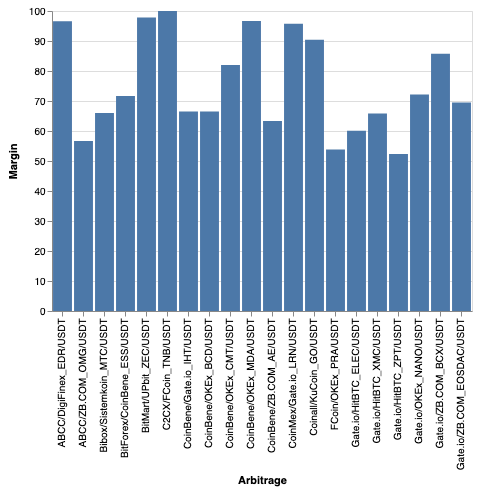

In [29]:
source = visual_data[0:20]

alt.Chart(source).mark_bar().encode(
    x='Arbitrage',
    y='Margin'
)

### Recommended Transaction
The best opportunity at this particular time, 4:21 PM Mountain Time on Sunday, March 10th, 2019 is the following:
        1. Purchase Time New Bank(TNB) on C2CX exchange. Fees: https://www.c2cx.com/in/fees
        2. Sell TNB on FCoin exchange. Fees: https://support.fcoin.com/hc/en-us/articles/360003715514-Trading-Rules
        3. Estimated margin/spread: 99.99%

### Conclusion
Exchange rates for cryptoassets are highly volatile and transactions would need to be initiated and completed very quickly to take full advantage of simple arbitrage opportunities. Data could be improved including fee calculation. More complete information could be better realized by also including other transaction limitations such as withdrawal fees, mandatory transaction waiting periods, and reputability of exchange marketplaces. Another concern includes the volume and frequency of which particular crypto-assets are traded on a given platform.

## References
1. Falk, T. (2018, December 19). Cryptocurrency arbitrage made easy: A beginner's guide. Retrieved March 10, 2019, from https://www.finder.com/cryptocurrency-arbitrage